SIR model
=========

The SIR model is a compartment-based epidemiological model based on three states: susceptible, infected and recovered.

The equations for the model are
$$
\begin{align}
\frac{dS}{dt} &= -\frac{\beta S I}{N} \\
\frac{dI}{dt} &= \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align}
$$

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations

In [48]:
# Simulation parameters
#
# R-number is beta/gamma (2.0 in this example)

beta = 0.6
gamma = 0.3

# Start with 0.1% of people infected:
N = 100
I0 = 0.1
S0 = N - I0
R0 = 0

#
# RHS of the system of ODEs
#
def f_SIR(t, Y):
    S, I, R = Y
    
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    
    dYdt = [dSdt, dIdt, dRdt]
    return dYdt

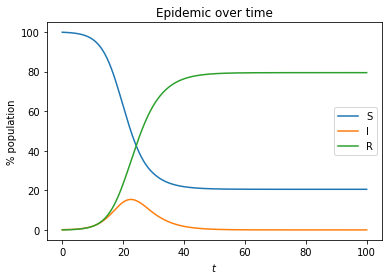

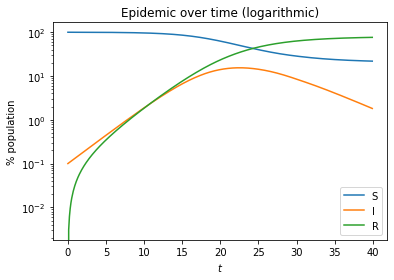

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

t = np.linspace(0, 100, 1000)

Y0 = [S0, I0, R0]

Yt = solve_ivp(f_SIR, [0, 100], Y0, t_eval=t)

plt.figure()
plt.plot(t, Yt.y.T)
plt.title('Epidemic over time')
plt.legend(['S', 'I', 'R'])
plt.xlabel('$t$');
plt.ylabel('% population');

plt.figure()
plt.semilogy(t[:400], Yt.y.T[:400,:])
plt.title('Epidemic over time (logarithmic)')
plt.legend(['S', 'I', 'R'])
plt.xlabel('$t$');
plt.ylabel('% population');


In [40]:
# Reproduction number

R = beta/gamma

print('R =', R)

S_infinity = N / R

print('S_infinity =', S_infinity)

R = 2.0
S_infinity = 50.0
